# Product Sales 2019

The dataset folder contains 12 files of sales records for each month. <br>
Each file consists of 6 columns. Those columns are:
1. Order ID: The ID when the order was made
2. Product: The name of the product bought
3. Quantity Ordered: The number of products ordered
4. Price Each: Price of each product
5. Order Date: The date the order was made
6. Purchase Address: The address of the store where the purchase was made <br>

### Questions to answer
1. What was the most bought product by month?
2. What was the top 5 bought product by year?
3. What was the total revenue by month?
4. Dive deeper to get whatever interesting insights that you can find

In [1]:
# import the necessary modules
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

product_sales = pd.DataFrame()

# merging all the files in the dataset folder into one file
for file in os.listdir('dataset/'):
    if file.endswith('.csv'):
        sales = pd.read_csv('dataset/'+file)
        product_sales = pd.concat([product_sales, sales])

product_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [2]:
product_sales.shape

(186850, 6)

## Cleaning
Clean the dataset first before conducting analysis to ensure a more accurate result.

In [3]:
product_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 13621
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


The original size of the df was (186850, 6) and the count of non-null values was (186305, 6). This means that there are null values in the dataset.

## Check and Remove of Null Values

In [4]:
# get a quick gist of the unique values of each column
for col in product_sales.columns:
    print(product_sales[col].unique())

['295665' '295666' '295667' ... '222907' '222908' '222909']
['Macbook Pro Laptop' 'LG Washing Machine' 'USB-C Charging Cable'
 '27in FHD Monitor' 'AA Batteries (4-pack)' 'Bose SoundSport Headphones'
 'AAA Batteries (4-pack)' 'ThinkPad Laptop' 'Lightning Charging Cable'
 'Google Phone' 'Wired Headphones' 'Apple Airpods Headphones'
 'Vareebadd Phone' 'iPhone' '20in Monitor' '34in Ultrawide Monitor'
 'Flatscreen TV' '27in 4K Gaming Monitor' 'Product' nan 'LG Dryer']
['1' '2' '4' '3' 'Quantity Ordered' nan '7' '5' '6' '8' '9']
['1700' '600.0' '11.95' '149.99' '3.84' '99.99' '2.99' '999.99' '14.95'
 '600' '11.99' '150' '400' '700' '109.99' '379.99' '300' '389.99'
 'Price Each' nan '700.0' '1700.0' '150.0' '300.0' '400.0']
['12/30/19 00:01' '12/29/19 07:03' '12/12/19 18:21' ... '06/09/19 22:07'
 '06/26/19 18:35' '06/25/19 14:33']
['136 Church St, New York City, NY 10001'
 '562 2nd St, New York City, NY 10001'
 '277 Main St, New York City, NY 10001' ...
 '590 Wilson St, Los Angeles, CA 90001'

As seen from the results above, the Product column and Quantity Ordered column contains nan values. Furthermore, the Quantity Ordered column also contains rows whose values are 'Quantity Ordered'. I'm going to count the number of rows that contains null values and drop them.

In [5]:
df_col = product_sales.columns

for col in df_col:
    if col in df_col:
        display(f'{col}: {product_sales[product_sales[col].isnull()].shape}')

'Order ID: (545, 6)'

'Product: (545, 6)'

'Quantity Ordered: (545, 6)'

'Price Each: (545, 6)'

'Order Date: (545, 6)'

'Purchase Address: (545, 6)'

Now I'm going to filter for the null values to decide what to do with them.

In [6]:
product_sales[product_sales['Order ID'].isnull()].head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
264,NaN,NaN,NaN,NaN,NaN,NaN
648,NaN,NaN,NaN,NaN,NaN,NaN
680,NaN,NaN,NaN,NaN,NaN,NaN
1385,NaN,NaN,NaN,NaN,NaN,NaN
1495,NaN,NaN,NaN,NaN,NaN,NaN


Since every single column contains NaN values. I'm going to remove them form the dataset.

In [7]:
product_sales = product_sales.dropna(how='all')

# check to see if the dropping works
product_sales[product_sales['Order ID'].isnull()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [8]:
# check to see if the null values were all successfully dropped in all columns
for col in df_col:
    if col in df_col:
        display(f'{col}: {product_sales[product_sales[col].isnull()].shape}')

'Order ID: (0, 6)'

'Product: (0, 6)'

'Quantity Ordered: (0, 6)'

'Price Each: (0, 6)'

'Order Date: (0, 6)'

'Purchase Address: (0, 6)'

The dropping seem to be successful.

In [9]:
# check to see how many rows were left after the dropping
print(f'No. of rows: {product_sales.shape[0]}')

No. of rows: 186305


## Removing "Quantity Ordered" Values

In [10]:
for col in product_sales.columns:
    print(product_sales[col].unique())

['295665' '295666' '295667' ... '222907' '222908' '222909']
['Macbook Pro Laptop' 'LG Washing Machine' 'USB-C Charging Cable'
 '27in FHD Monitor' 'AA Batteries (4-pack)' 'Bose SoundSport Headphones'
 'AAA Batteries (4-pack)' 'ThinkPad Laptop' 'Lightning Charging Cable'
 'Google Phone' 'Wired Headphones' 'Apple Airpods Headphones'
 'Vareebadd Phone' 'iPhone' '20in Monitor' '34in Ultrawide Monitor'
 'Flatscreen TV' '27in 4K Gaming Monitor' 'Product' 'LG Dryer']
['1' '2' '4' '3' 'Quantity Ordered' '7' '5' '6' '8' '9']
['1700' '600.0' '11.95' '149.99' '3.84' '99.99' '2.99' '999.99' '14.95'
 '600' '11.99' '150' '400' '700' '109.99' '379.99' '300' '389.99'
 'Price Each' '700.0' '1700.0' '150.0' '300.0' '400.0']
['12/30/19 00:01' '12/29/19 07:03' '12/12/19 18:21' ... '06/09/19 22:07'
 '06/26/19 18:35' '06/25/19 14:33']
['136 Church St, New York City, NY 10001'
 '562 2nd St, New York City, NY 10001'
 '277 Main St, New York City, NY 10001' ...
 '590 Wilson St, Los Angeles, CA 90001'
 '685 Hicko

Next, I'm going to filter the Quantity Ordered column that has a value of 'Quantity Ordered'

In [11]:
product_sales[product_sales['Quantity Ordered'] == 'Quantity Ordered'].head()
length = f'length: {len(product_sales[product_sales["Quantity Ordered"] == "Quantity Ordered"])}'
display(product_sales[product_sales['Quantity Ordered'] == 'Quantity Ordered'].head(),
        length)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
254,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
705,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1101,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2875,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3708,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


'length: 355'

In order to save space, only 5 rows are displayed. From the result, itt looks like these rows can be dropped as well since each of the columns were filled in with its header name. 

In [12]:
product_sales = product_sales[product_sales['Quantity Ordered'] != 'Quantity Ordered']

# check to see if the filtering works
product_sales[product_sales['Quantity Ordered'] == 'Quantity Ordered']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [13]:
# check to see how many rows were left after the filter
print(f'No. of rows: {product_sales.shape[0]}')

No. of rows: 185950


## Set Column Dtype to Its Proper Dtype

In [14]:
product_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 13621
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


After getting rid of the inconsistencies, I'm going to change the dtypes of Quantity Ordered, Price Each and Order date to int, float and date respectively.

In [15]:
product_sales['Quantity Ordered'] = pd.to_numeric(product_sales['Quantity Ordered'], downcast='integer')
product_sales['Price Each'] = pd.to_numeric(product_sales['Price Each'], downcast='float')
product_sales['Order Date'] = pd.to_datetime(product_sales['Order Date'])

In [16]:
product_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 13621
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int8          
 3   Price Each        185950 non-null  float32       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float32(1), int8(1), object(3)
memory usage: 8.0+ MB


After getting rid of null values and changing the column dtypes to its proper dtypes, I'm going to check for duplicate values and decide what to do to the after looking at the duplciated rows.

## Check and Remove Duplicate Rows

In [17]:
# check for duplicates
product_sales[product_sales['Order ID'].duplicated(keep=False)].head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
16,295681,Google Phone,1,600.000000,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215"
17,295681,USB-C Charging Cable,1,11.950000,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215"
18,295681,Bose SoundSport Headphones,1,99.989998,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215"
19,295681,Wired Headphones,1,11.990000,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215"
36,295698,Vareebadd Phone,1,400.000000,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001"
37,295698,USB-C Charging Cable,2,11.950000,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001"
42,295703,AA Batteries (4-pack),1,3.840000,2019-12-17 12:27:00,"502 Jefferson St, Austin, TX 73301"
43,295703,Bose SoundSport Headphones,1,99.989998,2019-12-17 12:27:00,"502 Jefferson St, Austin, TX 73301"
66,295726,iPhone,1,700.000000,2019-12-25 14:49:00,"203 Lakeview St, Boston, MA 02215"
67,295726,Lightning Charging Cable,1,14.950000,2019-12-25 14:49:00,"203 Lakeview St, Boston, MA 02215"


From the results, it looks like there are plenty of duplicated values. However, after looking at the first 2 rows, it can be concluded that it's fine to have duplicated Order ID values since the product that was bought were not the same. In fact, this implies that this particular customer bought 2 products at once. <br><br>
Furthermore, it's fine to have duplicated values for each column alone. The one thing that cannot be allowed is that if there are duplicate rows, not duplicate values.

In [18]:
# count the number of duplicated rows
duplicates = product_sales.pivot_table(columns=product_sales.columns.tolist(), aggfunc='size')
duplicates = duplicates.reset_index().rename(columns={0:'Count'})
duplicate_rows = duplicates[duplicates['Count'] > 1]
display(duplicate_rows.head(),
        f'No. of rows: {duplicate_rows.shape[0]}')

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Count
871,142071,AA Batteries (4-pack),1,3.84,2019-01-17 23:02:00,"131 2nd St, Boston, MA 02215",2
4104,145143,Lightning Charging Cable,1,14.95,2019-01-06 03:01:00,"182 Jefferson St, San Francisco, CA 94016",2
5782,146765,Google Phone,1,600.00,2019-01-21 11:23:00,"918 Highland St, New York City, NY 10001",2
6773,147707,Wired Headphones,1,11.99,2019-01-04 16:50:00,"883 4th St, Dallas, TX 75001",2
8096,148984,USB-C Charging Cable,1,11.95,2019-01-08 17:36:00,"562 14th St, Boston, MA 02215",2


'No. of rows: 264'

It looks like there are 264 pairs of duplicated rows in the dataframe. I'm going to double check if this is true, after figuring out if it's true or not, I'm going to keep the first occurrence of each duplciated rows.

In [19]:
duplicate = product_sales[product_sales.duplicated(keep=False)]
display(duplicate.head(10),
        f'No. of rows: {duplicate.shape[0]}')

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
439,296081,Flatscreen TV,1,300.000000,2019-12-30 16:52:00,"970 Sunset St, Austin, TX 73301"
440,296081,Flatscreen TV,1,300.000000,2019-12-30 16:52:00,"970 Sunset St, Austin, TX 73301"
1734,297311,Bose SoundSport Headphones,1,99.989998,2019-12-07 07:30:00,"858 Willow St, Los Angeles, CA 90001"
1735,297311,Bose SoundSport Headphones,1,99.989998,2019-12-07 07:30:00,"858 Willow St, Los Angeles, CA 90001"
2821,298358,Apple Airpods Headphones,1,150.000000,2019-12-04 15:57:00,"482 8th St, San Francisco, CA 94016"
2822,298358,Apple Airpods Headphones,1,150.000000,2019-12-04 15:57:00,"482 8th St, San Francisco, CA 94016"
3130,298657,Lightning Charging Cable,1,14.950000,2019-12-01 18:22:00,"428 12th St, Atlanta, GA 30301"
3131,298657,Lightning Charging Cable,1,14.950000,2019-12-01 18:22:00,"428 12th St, Atlanta, GA 30301"
3376,298883,Wired Headphones,1,11.990000,2019-12-28 18:07:00,"516 Willow St, Los Angeles, CA 90001"
3377,298883,Wired Headphones,1,11.990000,2019-12-28 18:07:00,"516 Willow St, Los Angeles, CA 90001"


'No. of rows: 528'

To conserve space, I only filtered for the first 10 rows and displayed the total number of rows at the bottom of the results. The previous result shows 19 pairs of duplicate values while the result above show a total row number of 38. The results are accurate since `264 * 2 = 528`. Furthermore, as the values for each duplicate pairs are exactly the same, I'm going to keep the first occurrence only. <br><br>
When removing the duplicates, it means that 19 rows will be removed. to check this, since the original row number of the df is 13556, the new df without duplicates should be 13537 since `185950 - 264 = 185686`.

In [20]:
# check if the duplicate removal process is correct
x = len(product_sales)
y = len(product_sales[~product_sales.duplicated(keep='last')])
print(f'original df row num: {x} \ndf without duplicates: {y}\ndifference: {x-y}')

original df row num: 185950 
df without duplicates: 185686
difference: 264


Seems like the removal of the duplicates was done properly. Next I'm going to reassign product_sales to the new duplicated free df.

In [21]:
product_sales_clean = product_sales[~product_sales.duplicated(keep='last')]
product_sales_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700.000000,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.000000,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.950000,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.990005,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.950000,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301"


Now that the dataset is already clean, I can begin my EDA.

## Analysis

Before answering the questions given at the beginning of this notebook, I'm going to manipulate and add some columns to the df in order to make it easier for the analysis.

In [22]:
# ps -> product sales
ps_clean = product_sales_clean.copy()
ps_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700.000000,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.000000,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.950000,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.990005,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.950000,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301"


Columns to add:
1. Total Price = `Quantity Ordered * Price Each`
2. Date = Date part from the `Order Date` column
3. Month = Month part fromt the `Order Date` column
4. Time = Time part from the `Order Date` column
5. State = State name taken from `Purchase Address`
6. City = City name taken from `Purchase Address`
7. Zip Code = Zip code taken from `Purchase Address`

In [23]:
# add total price column
ps_clean['Total Price'] = ps_clean['Quantity Ordered'] * ps_clean['Price Each']

# add date column
ps_clean['Date'] = ps_clean['Order Date'].dt.date

# add month column
ps_clean['Month'] = ps_clean['Order Date'].dt.month

# add Hour column
ps_clean['Hour'] = ps_clean['Order Date'].dt.hour

# add state column
ps_clean['State'] = ps_clean['Purchase Address'].str.split(pat=',').str[2].str.split(pat=' ').str[1]

# add city column
ps_clean['City'] = ps_clean['Purchase Address'].str.split(pat=',').str[1].str.strip()

# add zip code column
ps_clean['Zip Code'] = ps_clean['Purchase Address'].str.split(pat=',').str[2].str.split(pat=' ').str[-1]

ps_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Price,Date,Month,Hour,State,City,Zip Code
0,295665,Macbook Pro Laptop,1,1700.000000,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",1700.000000,2019-12-30,12,0,NY,New York City,10001
1,295666,LG Washing Machine,1,600.000000,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",600.000000,2019-12-29,12,7,NY,New York City,10001
2,295667,USB-C Charging Cable,1,11.950000,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",11.950000,2019-12-12,12,18,NY,New York City,10001
3,295668,27in FHD Monitor,1,149.990005,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",149.990005,2019-12-22,12,15,CA,San Francisco,94016
4,295669,USB-C Charging Cable,1,11.950000,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",11.950000,2019-12-18,12,12,GA,Atlanta,30301


As we know, different regions in a city have different zip codes. I want to know if there are only 1 region in each city. If there's only 1 region per city (1 zip code per city), I'm going to drop the `Zip Code` column since its redundant.

In [24]:
ps_clean.pivot_table(columns=['State', 'City', 'Zip Code'], aggfunc='size')

State  City           Zip Code
CA     Los Angeles    90001       29564
       San Francisco  94016       44662
GA     Atlanta        30301       14863
MA     Boston         02215       19901
ME     Portland       04101        2451
NY     New York City  10001       24847
OR     Portland       97035        9998
TX     Austin         73301        9890
       Dallas         75001       14797
WA     Seattle        98101       14713
dtype: int64

It looks like there is only 1 region per city. Due to this reason, I'm going to drop the `Zip Code` column. <br><br>
Aside from that, the order of the columns seem messy, Because of this, I'm going to rearrange the columns as well to make it easier to work with.

In [25]:
# dropping the zip code column
ps_clean = ps_clean.drop('Zip Code', axis=1)

In [26]:
# rearrange column positions
tot_price_col = ps_clean.pop('Total Price')
date_col = ps_clean.pop('Date')
time_col = ps_clean.pop('Hour')
state_col = ps_clean.pop('State')
city_col = ps_clean.pop('City')
month_col = ps_clean.pop('Month')

# insert the popped columns 
ps_clean.insert(ps_clean.columns.get_loc('Price Each') + 1, 'Total Price', tot_price_col)
ps_clean.insert(ps_clean.columns.get_loc('Order Date') + 1, 'Date', date_col)
ps_clean.insert(ps_clean.columns.get_loc('Date') + 1, 'Hour', time_col)
ps_clean.insert(ps_clean.columns.get_loc('Purchase Address') + 1, 'City', city_col)
ps_clean.insert(ps_clean.columns.get_loc('City') + 1, 'State', state_col)
ps_clean.insert(ps_clean.columns.get_loc('Date') + 1, 'Month', month_col)

ps_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Total Price,Order Date,Date,Month,Hour,Purchase Address,City,State
0,295665,Macbook Pro Laptop,1,1700.000000,1700.000000,2019-12-30 00:01:00,2019-12-30,12,0,"136 Church St, New York City, NY 10001",New York City,NY
1,295666,LG Washing Machine,1,600.000000,600.000000,2019-12-29 07:03:00,2019-12-29,12,7,"562 2nd St, New York City, NY 10001",New York City,NY
2,295667,USB-C Charging Cable,1,11.950000,11.950000,2019-12-12 18:21:00,2019-12-12,12,18,"277 Main St, New York City, NY 10001",New York City,NY
3,295668,27in FHD Monitor,1,149.990005,149.990005,2019-12-22 15:13:00,2019-12-22,12,15,"410 6th St, San Francisco, CA 94016",San Francisco,CA
4,295669,USB-C Charging Cable,1,11.950000,11.950000,2019-12-18 12:38:00,2019-12-18,12,12,"43 Hill St, Atlanta, GA 30301",Atlanta,GA


Now that the dataframe looks easier to work with, I'm going to start answering the questions. <br><br>
### What was the most bought product by month?

In [27]:
most_bought = ps_clean.groupby(['Month', 'Product']).agg({'Quantity Ordered':'sum'})
most_bought = most_bought.reset_index().sort_values(['Month', 'Quantity Ordered'], ascending=[True, False])
most_bought_filter = most_bought.groupby('Month').agg({'Quantity Ordered':'max'})
most_bought_final = most_bought[most_bought['Quantity Ordered'].isin(most_bought_filter['Quantity Ordered'])]
most_bought_final

,Month,Product,Quantity Ordered
5,1,AAA Batteries (4-pack),1600.0
24,2,AAA Batteries (4-pack),1971.0
43,3,AAA Batteries (4-pack),2477.0
62,4,AAA Batteries (4-pack),2936.0
81,5,AAA Batteries (4-pack),2923.0
100,6,AAA Batteries (4-pack),2161.0
119,7,AAA Batteries (4-pack),2361.0
138,8,AAA Batteries (4-pack),2019.0
157,9,AAA Batteries (4-pack),1922.0
176,10,AAA Batteries (4-pack),3357.0


From the results above, it looks like AAA Batteries (4-pack) was the most popular product for 12 straight months. <br><br>
### What was the top 5 most bought product by year?

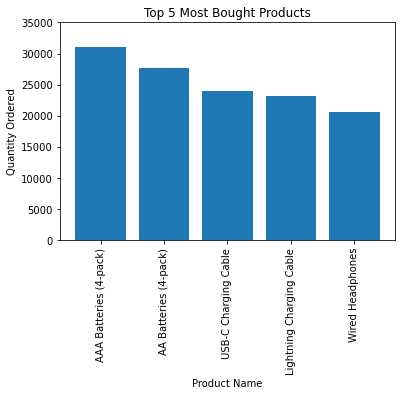

In [28]:
most_bought_year = ps_clean.groupby(['Product']).sum()
most_bought_year = most_bought_year.reset_index()
top_5_products = most_bought_year[['Product', 'Quantity Ordered']].sort_values('Quantity Ordered', ascending=False)
top_5_products = top_5_products.head()
top_5_products

top_5_products = most_bought_year[['Product', 'Quantity Ordered']].sort_values('Quantity Ordered', ascending=False)
top_5_products = top_5_products.head()

# create bar chart
def addlabels(x,y,offset=100): # This function will be used to label each bar chart
    for i in range(len(x)):
        plt.text(i, y[i]+offset, y[i], ha = 'center')
        
plt.bar(top_5_products['Product'], top_5_products['Quantity Ordered'])
plt.xlabel('Product Name')
plt.xticks(rotation=90)
plt.ylim([0, 35000])
plt.ylabel('Quantity Ordered')
plt.title('Top 5 Most Bought Products')
plt.show()

The results above show the top 5 most bought products in 2019. As seen above, the number one spot belongs to AAA batteries followed by AA batteries, USB-C charging cable, USB-C charging cable and wired headphones respectively.

### What was the total revenue by month?

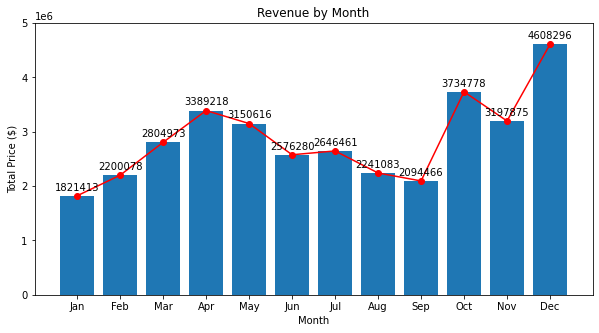

In [29]:
# revenue by month
import calendar

revenue = ps_clean.groupby('Month').agg({'Total Price':'sum'}).reset_index()
revenue['Total Price'] = revenue['Total Price'].apply(lambda x: round(x))
revenue['Month'] = revenue['Month'].apply(lambda x: calendar.month_abbr[x])

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.bar(revenue['Month'], revenue['Total Price'])
plt.plot(revenue['Month'], revenue['Total Price'], marker='o', color='red')
plt.xlabel('Month')
plt.ylim([0, 5e6])
plt.ylabel('Total Price ($)')
plt.title('Revenue by Month')
addlabels(revenue['Month'], revenue['Total Price'], 1e5)
plt.show()

From the graph, December generated the highest revenue. The overall trend of the graph is increasing except for April through September. The cause, however, is still unknown.

### Dive Deeper
For the next part, I'm going dive deeper by counting the number of products bought for each month.

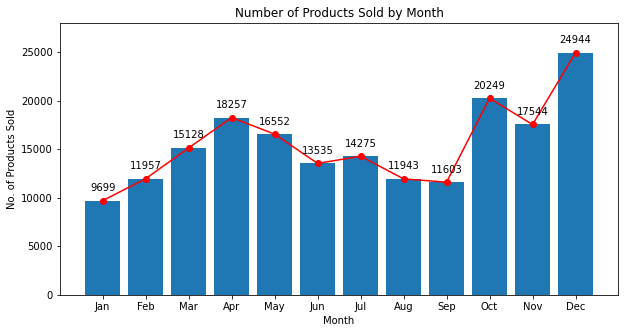

In [30]:
# number of products bought each month
prod_month = ps_clean.groupby('Month').agg({'Product':'count'}).reset_index()
prod_month['Month'] = prod_month['Month'].apply(lambda x: calendar.month_abbr[x])

# create bar chart
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.bar(prod_month['Month'], prod_month['Product'])
plt.plot(prod_month['Month'], prod_month['Product'], marker='o', color='red')
plt.xlabel('Month')
plt.ylim([0, 28000])
plt.ylabel('No. of Products Sold')
plt.title('Number of Products Sold by Month')
addlabels(prod_month['Month'], prod_month['Product'], 1000)
plt.show()

The trend above looks very similar to the revenue graph trend with December having the highest number of products sold and January with the lowest number of products sold. The overall trend is also increasing except for April through September.

Next, I'm going to see which products are the most popular in each state.

In [31]:
# most bought item per state
prod_state = ps_clean.groupby(['State', 'Product']).sum().reset_index()
prod_state = prod_state.sort_values('Quantity Ordered', ascending=False)
prod_state_filter = prod_state.groupby('State').max()
prod_state_final = prod_state[prod_state['Quantity Ordered'].isin(prod_state_filter['Quantity Ordered'])]
prod_state_final[['State', 'Product', 'Quantity Ordered']]

,State,Product,Quantity Ordered
5,CA,AAA Batteries (4-pack),12362.0
119,TX,AAA Batteries (4-pack),4168.0
81,NY,AAA Batteries (4-pack),4119.0
43,MA,AAA Batteries (4-pack),3458.0
138,WA,AAA Batteries (4-pack),2443.0
24,GA,AAA Batteries (4-pack),2358.0
100,OR,AAA Batteries (4-pack),1720.0
61,ME,AA Batteries (4-pack),389.0


The table above shows that AAA batteries were the most bought item in every single state except for ME since the most bought item was AA batteries.

Next, I'm going to check which products are the most popular in each city.

In [32]:
# most item bought per city
prod_city = ps_clean.groupby(['City', 'Product']).sum().reset_index()
prod_city = prod_city.sort_values('Quantity Ordered', ascending=False)
prod_city_filter = prod_city.groupby('City').max()

prod_city_final = prod_city[prod_city['Quantity Ordered'].isin(prod_city_filter['Quantity Ordered'])]
prod_city_final[['City', 'Product', 'Quantity Ordered']]

,City,Product,Quantity Ordered
138,San Francisco,AAA Batteries (4-pack),7404.0
81,Los Angeles,AAA Batteries (4-pack),4958.0
100,New York City,AAA Batteries (4-pack),4119.0
43,Boston,AAA Batteries (4-pack),3458.0
62,Dallas,AAA Batteries (4-pack),2500.0
157,Seattle,AAA Batteries (4-pack),2443.0
5,Atlanta,AAA Batteries (4-pack),2358.0
119,Portland,AAA Batteries (4-pack),2078.0
24,Austin,AAA Batteries (4-pack),1668.0


The results shows that AAA Batteries were the most bought item in each city. However, something doesn't add up. When looking at the previous result, AA batteries can be observed. On this result, it's nowhere to be found. Something wrong is going on here and I'm going to find out what went wrong.

In [33]:
display(prod_state[prod_state['State'] == 'ME'][['State', 'Product', 'Quantity Ordered']].head(),
        prod_city[prod_city['City'] == 'Portland'][['City', 'Product', 'Quantity Ordered']].head())

,State,Product,Quantity Ordered
61,ME,AA Batteries (4-pack),389.0
62,ME,AAA Batteries (4-pack),358.0
72,ME,USB-C Charging Cable,339.0
74,ME,Wired Headphones,279.0
69,ME,Lightning Charging Cable,268.0


,City,Product,Quantity Ordered
119,Portland,AAA Batteries (4-pack),2078.0
118,Portland,AA Batteries (4-pack),1939.0
129,Portland,USB-C Charging Cable,1580.0
126,Portland,Lightning Charging Cable,1528.0
131,Portland,Wired Headphones,1360.0


As seen above, the quantity ordered numbers doesn't add up. I'm going to filter for portland along with its state to see what's actually going on.

In [34]:
# filter for portland
portland = ps_clean[ps_clean['Purchase Address'].str.contains('Portland')]
portland = portland[['City', 'State']].drop_duplicates()
portland

,City,State
6,Portland,OR
24,Portland,ME


It looks like there were two Portlands in USA. The first one is Portland, Oregon and the other one is Portland, Maine. In order to solve this problem, I'm going to combine the city name alongside with its state name.

In [35]:
ps_clean['City'] = ps_clean['City'] + ' (' + ps_clean['State'] + ') '

In [36]:
# most bought item per city corrected version
prod_city = ps_clean.groupby(['City', 'Product']).sum().reset_index()
prod_city = prod_city.sort_values('Quantity Ordered', ascending=False)
prod_city_filter = prod_city.groupby('City').max()

prod_city_final = prod_city[prod_city['Quantity Ordered'].isin(prod_city_filter['Quantity Ordered'])]
prod_city_final[['City', 'Product', 'Quantity Ordered']]

,City,Product,Quantity Ordered
157,San Francisco (CA),AAA Batteries (4-pack),7404.0
81,Los Angeles (CA),AAA Batteries (4-pack),4958.0
100,New York City (NY),AAA Batteries (4-pack),4119.0
43,Boston (MA),AAA Batteries (4-pack),3458.0
62,Dallas (TX),AAA Batteries (4-pack),2500.0
176,Seattle (WA),AAA Batteries (4-pack),2443.0
5,Atlanta (GA),AAA Batteries (4-pack),2358.0
138,Portland (OR),AAA Batteries (4-pack),1720.0
24,Austin (TX),AAA Batteries (4-pack),1668.0
118,Portland (ME),AA Batteries (4-pack),389.0


The result above looks accurate since the numbers all add up to the `prod_state_final` result. It can be seen that the most popular item bought was AAA batteries for in every city except for Portland (ME). 

Next, I'm going to see the revenue in each city. I'm not going to see the revenue for each state since in this case, the dataset only contains one city for each state except for the state of California. Making two graphs for each will result in the exact same graph except for the previous state mentioned.

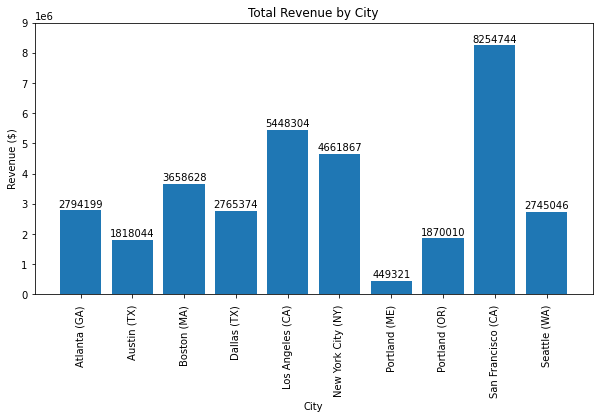

In [37]:
# revenue by city
rev_city = ps_clean.groupby('City').sum()['Total Price'].reset_index()
rev_city['Total Price'] = rev_city['Total Price'].apply(lambda x: round(x))

# create bar chart
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.bar(rev_city['City'], rev_city['Total Price'])
plt.xlabel('City')
plt.ylabel('Revenue ($)')
plt.ylim([0, 9e6])
plt.title('Total Revenue by City')
plt.xticks(rotation=90)
addlabels(rev_city['City'], rev_city['Total Price'], 1e5)
plt.savefig('images/total_revenue_by_city.png')
plt.show()

From the results, San Francisco was the one that had the most revenue with a value of \\$8,254,744. This is then followed by LA with a revenue of \\$5,448,304. The city which generated the least revenue was Portland (ME) with a value of \\$449,321.

This means that the management of the company should focus on Portland (ME) to increase their sales since it's the only city that only generated revenue with 6 figures while the rest generated 7 figures.

I'm going to dive deeper to see which cities generated the most revenue by month

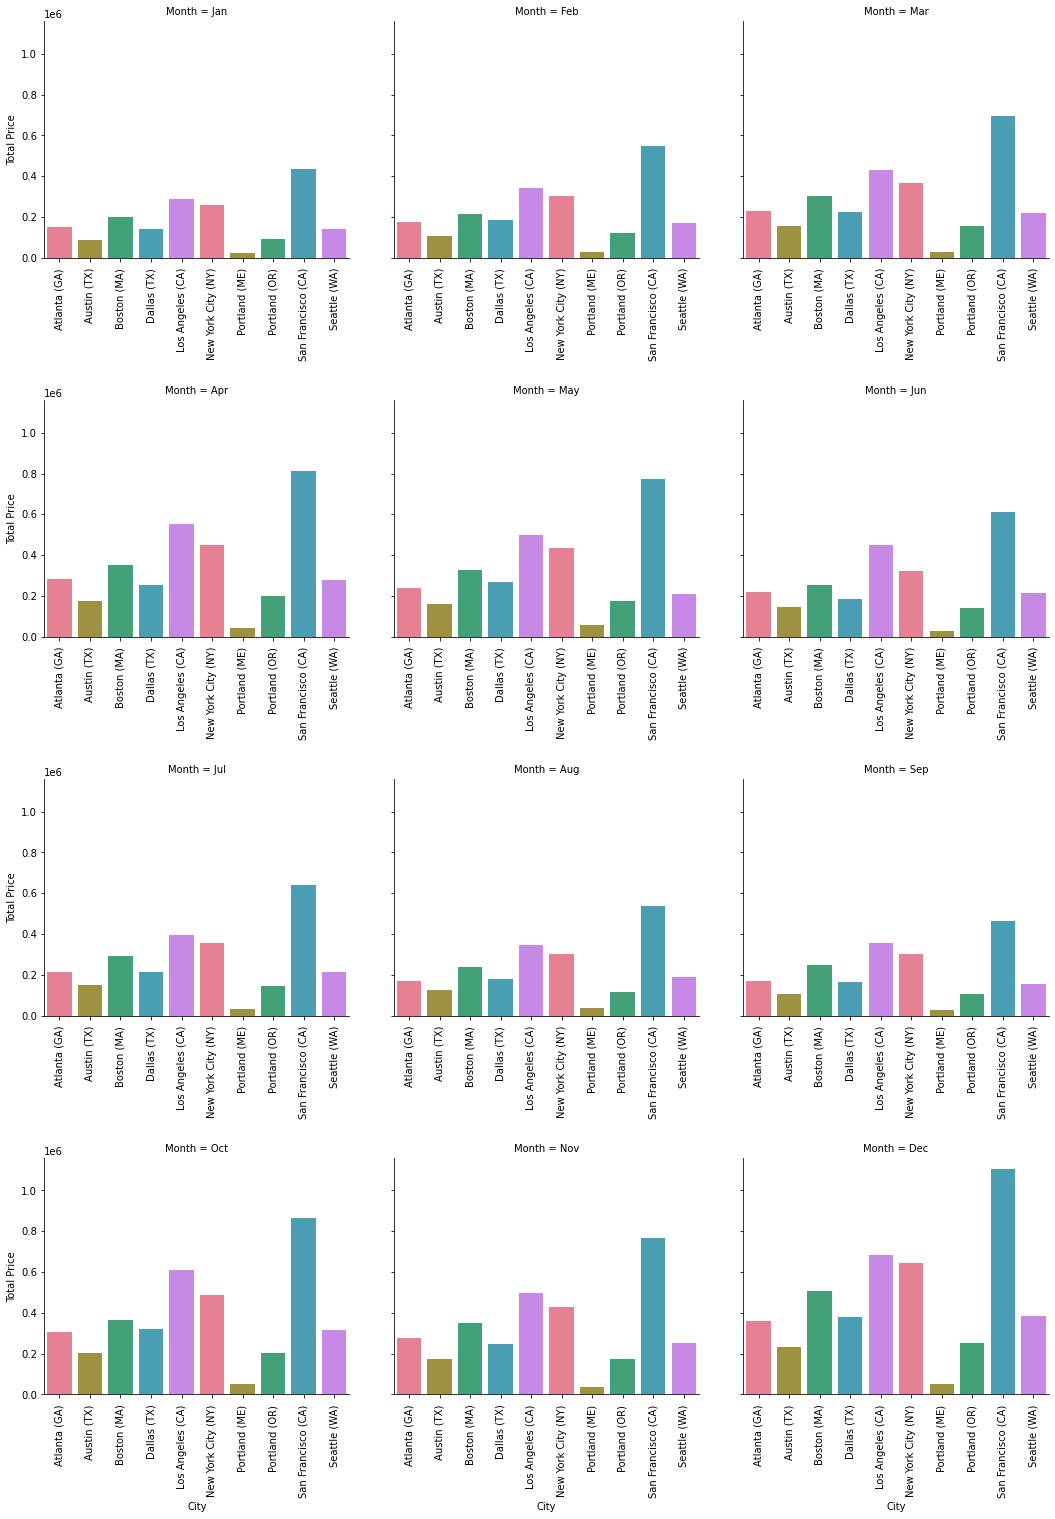

In [38]:
# cities that generated the most revenue by month
rev_city_month = ps_clean.groupby(['Month', 'City']).sum().reset_index()
rev_city_month['Month'] = rev_city_month['Month'].apply(lambda x: calendar.month_abbr[x])

import warnings
warnings.simplefilter('ignore', UserWarning)

palette = sns.color_palette('husl', 5)
g = sns.catplot(x='City', y='Total Price', data=rev_city_month, 
                kind='bar', col='Month', col_wrap=3, palette=palette,
                sharex=False)
g.set_xticklabels(rotation=90)
plt.subplots_adjust(hspace=.6)
plt.show()

Although the values of revenues for each month per city varies, the trend is still exactly the same. There are no major differences between the trend of each month with the overall trend of revenues by city.

Next, I'm going to see at which time does customers usually buy products.

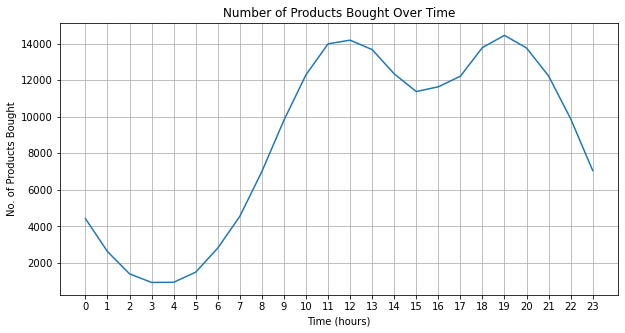

In [39]:
prod_time = ps_clean.groupby('Hour').sum().reset_index()
prod_time = prod_time[['Hour', 'Quantity Ordered']]

# create line plot
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.plot(prod_time['Hour'], prod_time['Quantity Ordered'])
plt.xlabel('Time (hours)')
plt.xticks(prod_time['Hour'])
plt.ylabel('No. of Products Bought')
plt.title('Number of Products Bought Over Time')
plt.grid()
plt.show()

The figure shows that the peak time for customers to buy things were at 12 PM and 7 PM. This means that if the advertising team wants to advertise new products, they should advertise their products 11 AM, 12 PM, 18 PM or 19 PM.

I'm going to dive deeper by looking at the number of products bought over time in each city.

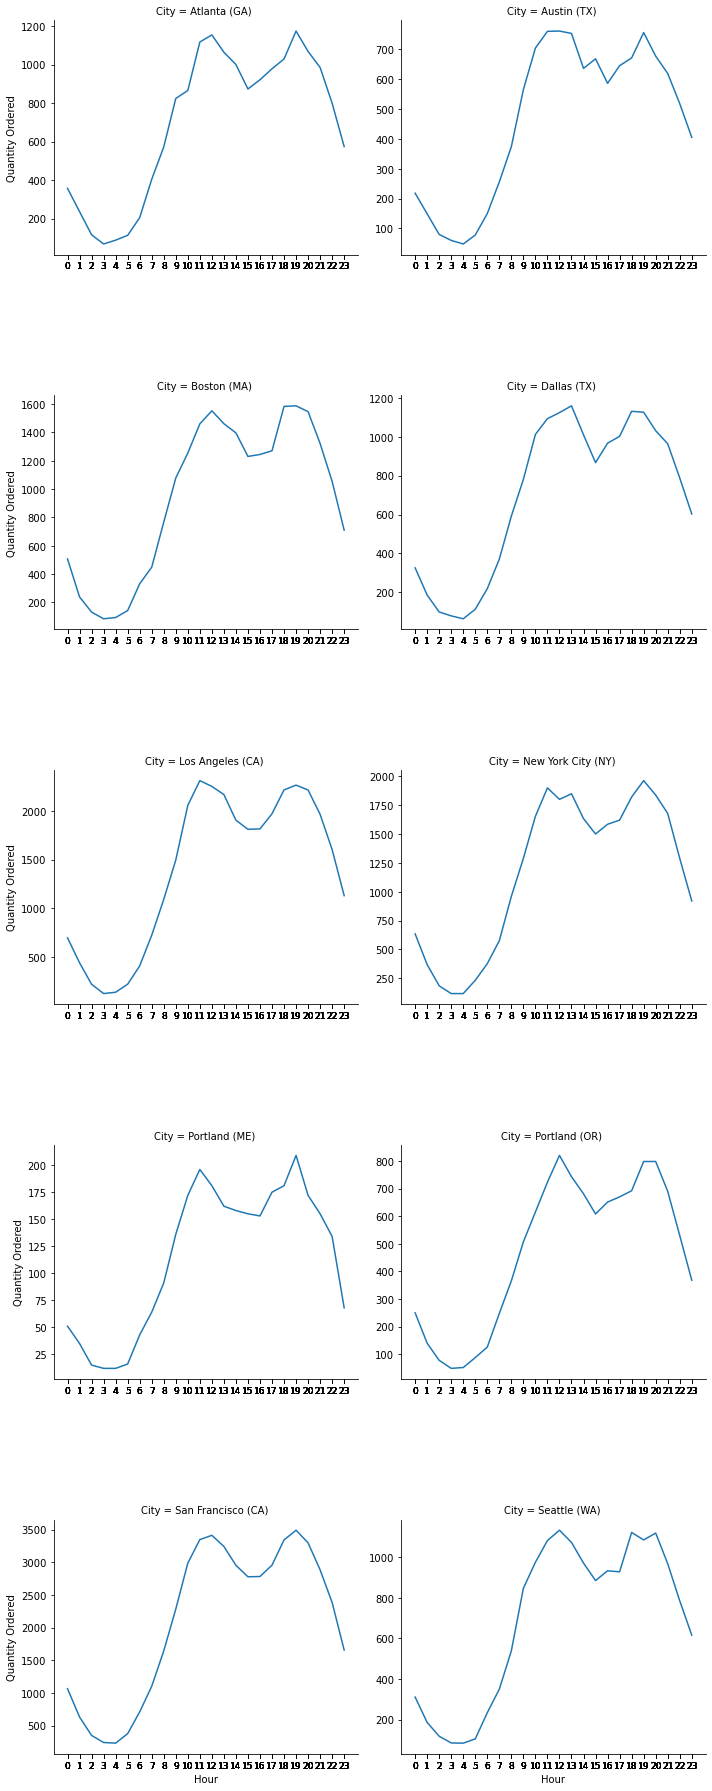

In [40]:
prod_time_city = ps_clean.groupby(['Hour', 'City']).sum().reset_index()

g = sns.relplot(x='Hour', y='Quantity Ordered', data=prod_time_city, 
                kind='line', col='City', col_wrap=2, 
                facet_kws={'sharex':False, 'sharey':False})
g.set(xticks=prod_time_city['Hour'])
g.set_xticklabels(prod_time_city['Hour'], rotation=0, size=9)
plt.subplots_adjust(hspace=.6)
plt.show()

The trends in each city is also the same where the peak time for customers to order products were around 12 PM and 7 PM.

Next, I'm going to see which product are usually bought together.

In [41]:
# for each order id, combine the products bought 
bundle = ps_clean
bundle = bundle[bundle['Order ID'].duplicated(keep=False)].copy()
bundle['Bundle'] = bundle.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
bundle_final = bundle[['Order ID', 'Bundle']].drop_duplicates()

# count the number of groups
from itertools import combinations
from collections import Counter

count = Counter()

for row in bundle['Bundle']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2))) # 2 is set to find pairs of 2

for key, value in count.most_common(10):
    print(f'{key}: {value}')

('iPhone', 'Lightning Charging Cable'): 2125
('Google Phone', 'USB-C Charging Cable'): 2106
('iPhone', 'Wired Headphones'): 987
('Google Phone', 'Wired Headphones'): 943
('iPhone', 'Apple Airpods Headphones'): 799
('Vareebadd Phone', 'USB-C Charging Cable'): 773
('Google Phone', 'Bose SoundSport Headphones'): 503
('USB-C Charging Cable', 'Wired Headphones'): 443
('Vareebadd Phone', 'Wired Headphones'): 327
('Lightning Charging Cable', 'Wired Headphones'): 253


The result above shows the top 10 most common pairs of 2 products bought together were an iPhone and a lightning charging cable followed by a Google phone and a USB-C charging cable.

In [42]:
count = Counter()

for row in bundle['Bundle']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 3)))

for key, value in count.most_common(10):
    print(f'{key}: {value}')

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones'): 262
('iPhone', 'Lightning Charging Cable', 'Wired Headphones'): 193
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones'): 146
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'): 109
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones'): 101
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones'): 86
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones'): 75
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'): 50
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones'): 20
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones'): 17


When it comes to pairs of 3, the most common products bought together were a Google phone, USB-C charging cable and wired headphones followed by an iPhone, lightning charging cable and wired headphones.

Next, I want to compare the number of products bought against its price.

In [43]:
# products bought against price
prod_price_each = ps_clean[['Product', 'Price Each']].drop_duplicates()
prod_price_each['Price Each'] = prod_price_each['Price Each'].apply(lambda x: round(x, 2))

# join top_products & prod_price_each
top_products = most_bought_year[['Product', 'Quantity Ordered']]
top_products = top_products.merge(prod_price_each, how='inner')
top_products

,Product,Quantity Ordered,Price Each
0,20in Monitor,4126.0,109.99
1,27in 4K Gaming Monitor,6239.0,389.99
2,27in FHD Monitor,7541.0,149.99
3,34in Ultrawide Monitor,6192.0,379.99
4,AA Batteries (4-pack),27615.0,3.84
5,AAA Batteries (4-pack),30986.0,2.99
6,Apple Airpods Headphones,15637.0,150.00
7,Bose SoundSport Headphones,13430.0,99.99
8,Flatscreen TV,4813.0,300.00
9,Google Phone,5529.0,600.00


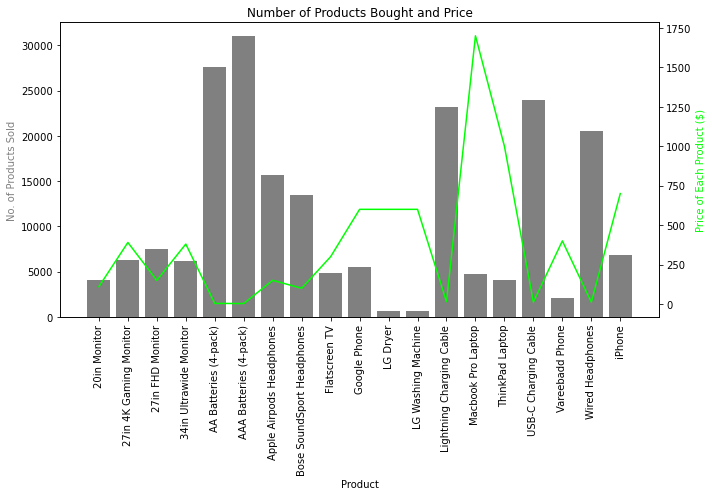

In [44]:
fig, ax = plt.subplots(figsize = (10, 7))
plt.title('Number of Products Bought and Price')
 
ax2 = ax.twinx()
ax.bar(top_products['Product'], top_products['Quantity Ordered'], color = 'grey')
ax2.plot(top_products['Product'], top_products['Price Each'], color = 'lime')

ax.set_xlabel('Product', color = 'black')
ax.set_xticklabels(top_products['Product'], rotation=90)
ax.set_ylabel('No. of Products Sold', color = 'grey')
ax2.set_ylabel('Price of Each Product ($)', color = 'lime')
plt.tight_layout()
plt.show()

Based on the results, cheaper products seem to be bought the most except for some. As seen above, the price of batteries were the cheapest and were bought the most by customers. Products that were expensive such as LG dryer and LG washing machine were bought the least. However, laptops such as the Macbook Pro and ThinkPad were two of the most expensive products yet they were bought more than the LG dryer and LG washing machine. This might be because the number of people who needs a laptop is more compared to people who needs a dryer or a washing machine.